Import bibliotek i modułów

In [616]:
from pywin32_testutil import testmain, TestProgram
from scipy.ndimage import histogram
from scipy.stats import logistic
# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

Wczytywanie danych z pliku

In [617]:
# Wczytywanie 20000 pierwszych rekordów z pliu CSV do DataFrame o nazwie TrainData, oraz reszty do TestData
file_path = "Student_Depression_Dataset.csv"
FullData = pd.read_csv(file_path)

# Filtrujemy, aby pozostały tylko wartości Studentów
FullData = FullData[FullData['Profession'] == 'Student']

# Potem przed podziałem usuniemy zbędne kolumny które nas nie interesuja 
FullData = FullData.drop(columns = ['id', 'Gender', 'City', 'Degree', 'Profession', 'Work Pressure', 'Job Satisfaction'])
# Sprawdzamy czy są puste wartości w jakichś kolumnach 
print("\nMissing Value Counts:")
print(FullData.isnull().sum())

FullData



Missing Value Counts:
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
1,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
2,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0
3,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1
4,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Yes,7.0,1.0,Yes,0
27897,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,No,0.0,3.0,Yes,0
27898,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,No,12.0,2.0,No,0
27899,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Yes,10.0,5.0,No,1


Usuwanie pustych wartości

In [618]:
FullData['Financial Stress'] = FullData['Financial Stress'].fillna(FullData['Financial Stress'].median())

In [619]:
# Podział na dwa podzbiory danych 
TrainData = FullData.iloc[:20000].reset_index(drop=True)
TestData = FullData.iloc[20000:].reset_index(drop=True)
# Upewniamy się że na pewno nie ma żadnych pustych wartoścci w zbiorze traningowywm 
print("\nMissing Value Counts:")
print(TrainData.isnull().sum())




Missing Value Counts:
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Zmiana danych tekstowych na liczbowe żeby łatwiej było je analizować 

In [620]:
# Poźniej zmieniamy dane tekstowe na liczbowe aby łatwiej było je przetwarzać 
#Mapy z róznymi odpowiedziami na skali 
maps = {
    'Sleep Duration': {'Less than 5 hours': 5, '5-6 hours': 6, '7-8 hours': 7.5, 'More than 8 hours': 9, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}
for col, mapping in maps.items():
    TrainData[col] = TrainData[col].map(mapping)
    TestData[col] = TestData[col].map(mapping)
    FullData[col] = FullData[col].map(mapping)

# Mapy binarne na odpoweidzi tak i nie 
binary_maps = {
    'Have you ever had suicidal thoughts ?': {'Yes': 1, 'No': 0},
    'Family History of Mental Illness': {'Yes': 1, 'No': 0}
}
for col, mapping in binary_maps.items():
    TrainData[col] = TrainData[col].map(mapping)
    TestData[col] = TestData[col].map(mapping)
    FullData[col] = FullData[col].map(mapping)

Tworzenie macierzy korelacji dla wszytskich podzbiorów

Macierza korelacji dla pełnego zbioru danych 
 


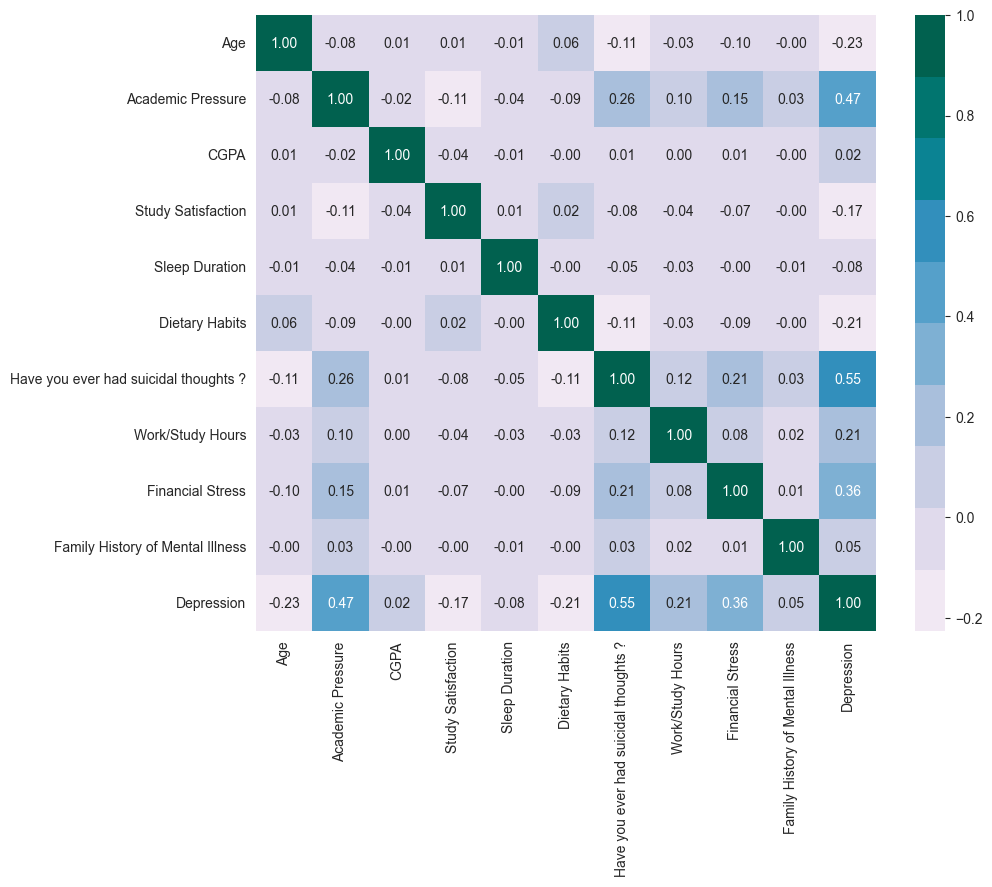

Macierza korelacji dla trenowanego zbioru danych 
 


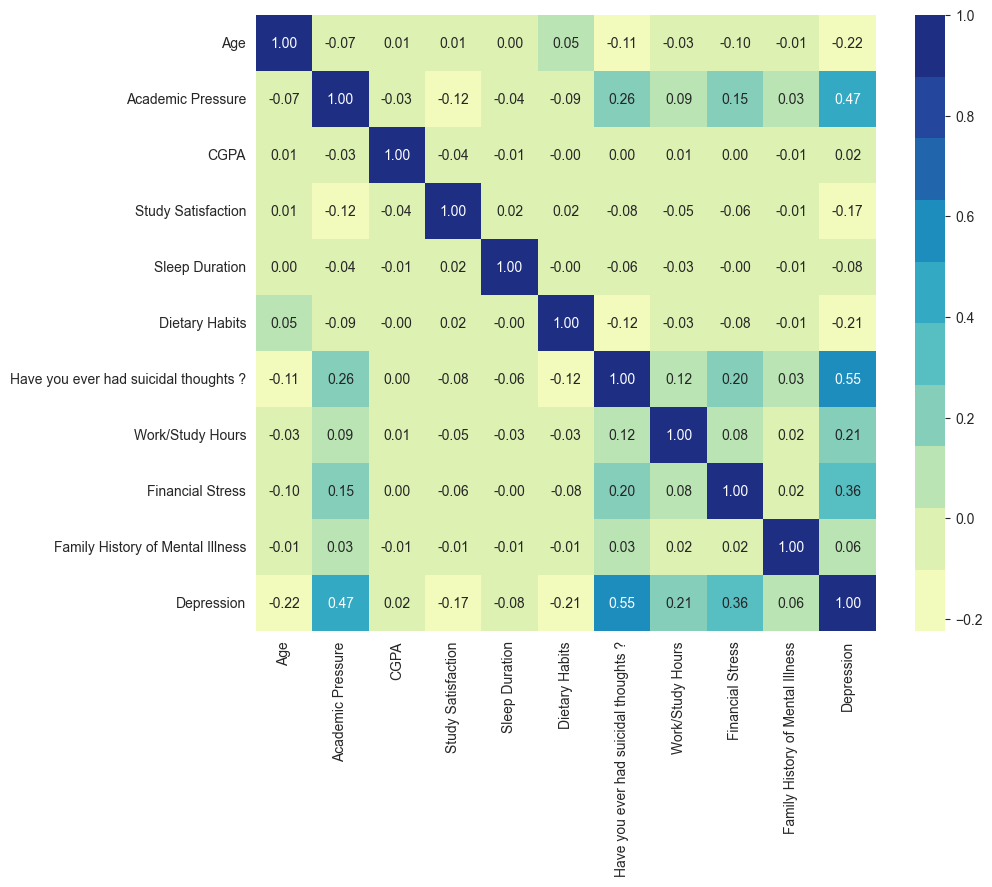

Macierza korelacji dla Testowego zbioru danych 
 


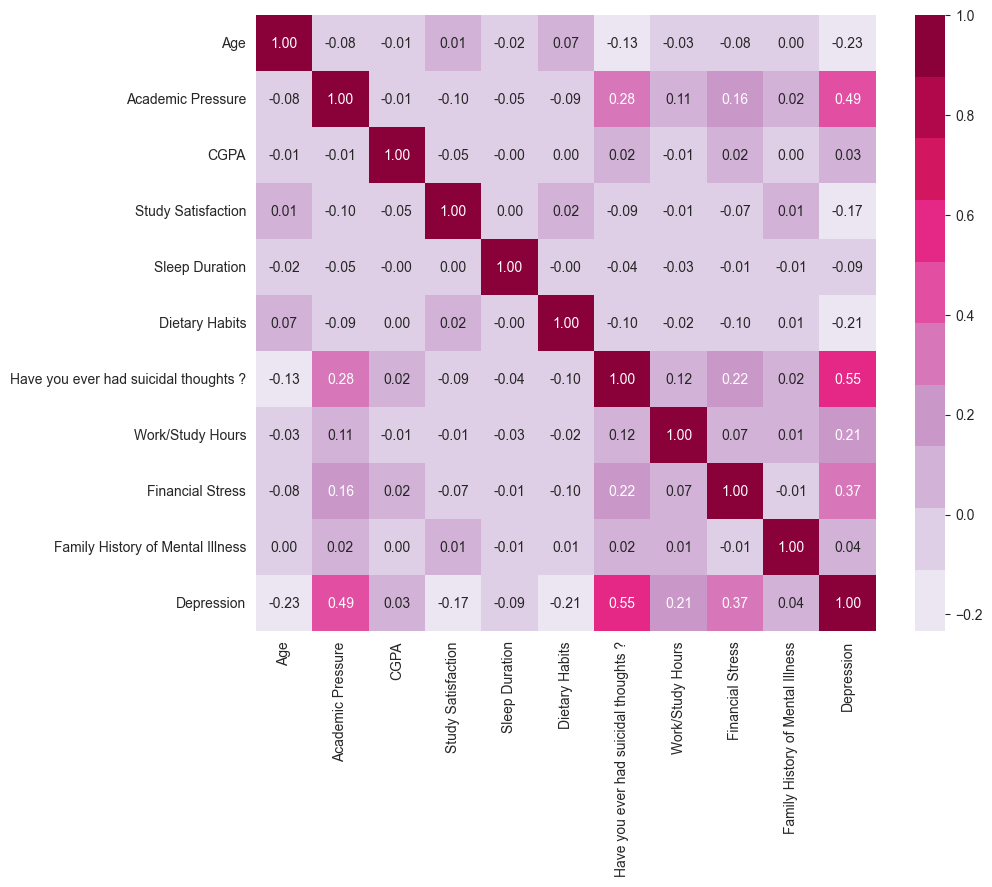

In [621]:
#Sprawdźmy jak wygląda Maccierz Kolrelacji na wszytskich zbiorach dancyh 
correlations = FullData.corr()
fig, ax = plt.subplots(figsize=(10, 8))

colormap = sns.color_palette("PuBuGn", 10)

sns.heatmap(correlations,
            cmap=colormap,
            annot=True,
            fmt=".2f")
ax.set_yticklabels(FullData.columns)
print("Macierza korelacji dla pełnego zbioru danych \n ")
plt.show()

correlations = TrainData.corr()
fig, ax = plt.subplots(figsize=(10, 8))

colormap = sns.color_palette("YlGnBu", 10)

sns.heatmap(correlations,
            cmap=colormap,
            annot=True,
            fmt=".2f")
ax.set_yticklabels(TrainData.columns)
print("Macierza korelacji dla trenowanego zbioru danych \n ")
plt.show()

correlations = TestData.corr()
fig, ax = plt.subplots(figsize=(10, 8))

colormap = sns.color_palette("PuRd", 10)

sns.heatmap(correlations,
            cmap=colormap,
            annot=True,
            fmt=".2f")
ax.set_yticklabels(TestData.columns)
print("Macierza korelacji dla Testowego zbioru danych \n ")
plt.show()

Wykresy histogramowe oraz plot boxy

Wykres wieku 


<Axes: ylabel='Frequency'>

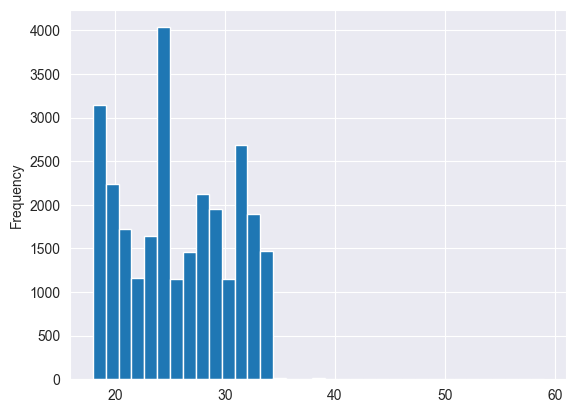

In [622]:
#Aby dalej przeanalizować dane wyświetlimy wykresy typu plot.box
print("Wykres wieku ")
#FullData['Age'].plot.box()
FullData['Age'].plot.hist(bins=35)

Wykres Czasu poświęcanego na Naukę


<Axes: ylabel='Frequency'>

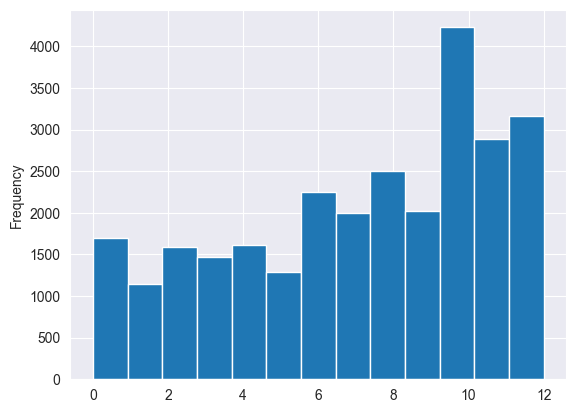

In [623]:
print("Wykres Czasu poświęcanego na Naukę")
#FullData['Work/Study Hours'].plot.box()
FullData['Work/Study Hours'].plot.hist(bins=13)

Wykres Satysfakcji studentów z Nauki


<Axes: ylabel='Frequency'>

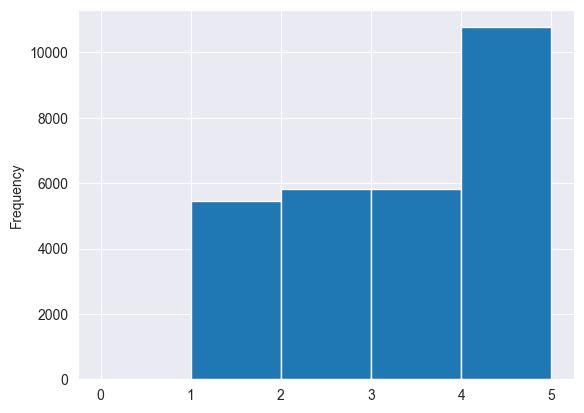

In [624]:
print("Wykres Satysfakcji studentów z Nauki")
#FullData['Study Satisfaction'].plot.box()
FullData['Study Satisfaction'].plot.hist(bins=5)

Przygotowanie danych treningowych oraz etykiet

In [625]:
# Prepare training set (all data without labels)
X = TrainData.drop('Depression', axis=1).to_numpy()
X

array([[33.  ,  5.  ,  8.97, ...,  3.  ,  1.  ,  0.  ],
       [24.  ,  2.  ,  5.9 , ...,  3.  ,  2.  ,  1.  ],
       [31.  ,  3.  ,  7.03, ...,  9.  ,  1.  ,  1.  ],
       ...,
       [30.  ,  3.  ,  9.94, ...,  3.  ,  5.  ,  1.  ],
       [28.  ,  5.  ,  6.  , ...,  2.  ,  4.  ,  0.  ],
       [18.  ,  3.  ,  7.3 , ...,  4.  ,  4.  ,  0.  ]], shape=(20000, 10))

In [626]:
# Prepare labels for training set
y = TrainData.loc[:, 'Depression'].to_numpy()
y

array([1, 0, 0, ..., 1, 0, 0], shape=(20000,))

In [627]:
# Kolejny podział ☜(ﾟヮﾟ☜)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Accuracy: 0.84175

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1663
           1       0.86      0.87      0.87      2337

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



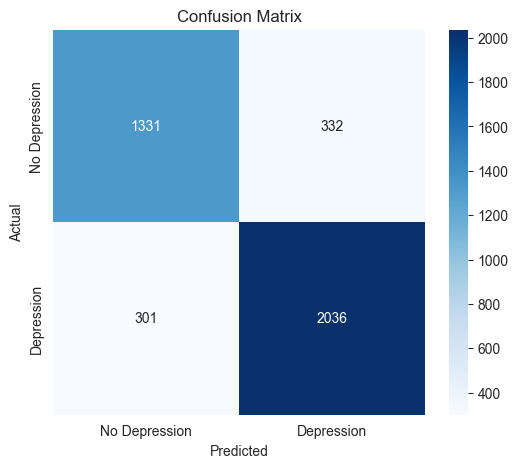

True Positive (TP): 2036
False Positive (FP): 332
True Negative (TN): 1331
False Negative (FN): 301


In [628]:
# Tworzymy model Random Forest Tree i trenujemy go
model_RFT = RandomForestClassifier(random_state=45)
model_RFT.fit(X_train, y_train)

# Robimy predykcje na podstawie wytrenowanego modelu RTF
predictions_RTF = model_RFT.predict(X_test)


# Ewaluujemy stworzony model żeby zobaczyć jak sobie radzi z przewidywaniem danych 
print("Accuracy:", accuracy_score(y_test, predictions_RTF))
print("\nClassification Report:\n", classification_report(y_test, predictions_RTF))

# Confusion matrix
cm = confusion_matrix(y_test, predictions_RTF)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Print the results
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

In [629]:
# Zapis modelu do pliku 
with open('model_RFT.pkl', 'wb') as file:
    pickle.dump(model_RFT, file)


Accuracy: 0.84825

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1663
           1       0.88      0.86      0.87      2337

    accuracy                           0.85      4000
   macro avg       0.84      0.85      0.84      4000
weighted avg       0.85      0.85      0.85      4000



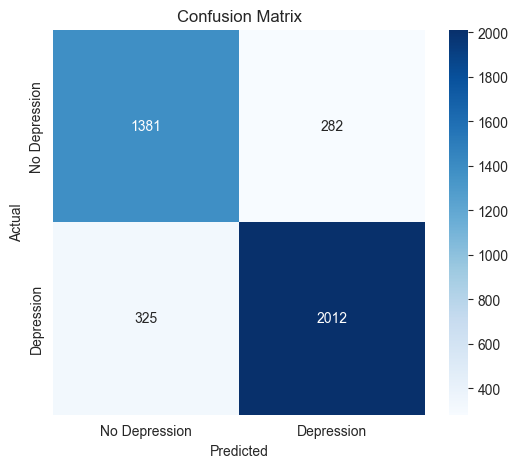

True Positive (TP): 2012
False Positive (FP): 282
True Negative (TN): 1381
False Negative (FN): 325


In [630]:
# Tworzymy model Sieci neuronowej i trenujemy je na tym samym DataFramie
model_MLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model_MLP.fit(X_train, y_train)
#ALT assessment option ->  accuracy = train_model(model_MLP, X_train, y_train, X_test)

predictions_MLP = model_MLP.predict(X_test)

# Znowu dokładna ewaluacja żeby zobaczyć co i jak 
print("Accuracy:", accuracy_score(y_test, predictions_MLP))
print("\nClassification Report:\n", classification_report(y_test, predictions_MLP))

# Confusion matrix
cm = confusion_matrix(y_test, predictions_MLP)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Print the results
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

In [631]:
# Zapis modelu opartego na sieci neuronowej do pliku i , guess it's better ヾ(•ω•`)o
with open('model_MLP.pkl', 'wb') as file:
    pickle.dump(model_MLP, file)

Accuracy: 0.8485

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1663
           1       0.86      0.88      0.87      2337

    accuracy                           0.85      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.85      0.85      0.85      4000



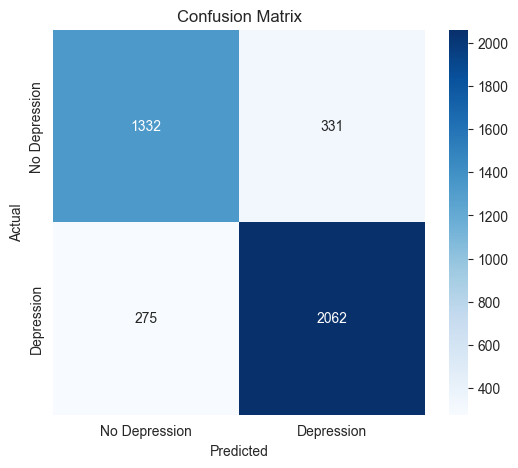

True Positive (TP): 2062
False Positive (FP): 331
True Negative (TN): 1332
False Negative (FN): 275


In [632]:
# Dwa modele to za mało, więc stworzymy jescze dla porównania mamy model Logicznej regresji ¯\_(ツ)_/¯
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

predictions_LR = model_LR.predict(X_test)

# Znowu dokładna ewaluacja żeby zobaczyć co i jak 
print("Accuracy:", accuracy_score(y_test, predictions_LR))
print("\nClassification Report:\n", classification_report(y_test, predictions_LR))

# Confusion matrix
cm = confusion_matrix(y_test, predictions_LR)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Extract TP, FP, TN, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Print the results
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

Przewidywanie z zapisywanie wyników z drugiego podzbioru danych 

In [633]:
# Wczytywanie najlepszego (moim zdaniem) modelu 
with open('model_MLP.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Ponowne przygotowanie danych, tym razem do części testowej naszego modelu 
X = TestData.drop('Depression', axis=1).to_numpy()
y = TestData.loc[:, 'Depression'].to_numpy()


predictions_To_File = loaded_model.predict(X)
TestData['Predicted_Depression'] = predictions_To_File
TestData.to_csv('Test_Results.csv', index=False)
print("Przewidywane wyniki zapisane do pliu CSV oraz wyświetlone poniżej")
TestData

    
    

Przewidywane wyniki zapisane do pliu CSV oraz wyświetlone poniżej


,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Predicted_Depression
0,31.0,3.0,7.53,1.0,7.5,1,0,3.0,1.0,1,0,0
1,23.0,4.0,9.93,2.0,5.0,1,1,8.0,5.0,0,1,1
2,27.0,4.0,5.38,2.0,6.0,3,0,8.0,4.0,0,1,0
3,25.0,3.0,5.60,4.0,6.0,3,1,11.0,5.0,1,1,1
4,20.0,2.0,7.09,3.0,6.0,3,0,11.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7865,27.0,5.0,5.75,5.0,6.0,1,1,7.0,1.0,1,0,1
7866,27.0,2.0,9.40,3.0,5.0,3,0,0.0,3.0,1,0,0
7867,31.0,3.0,6.61,4.0,6.0,1,0,12.0,2.0,0,0,0
7868,18.0,5.0,6.88,2.0,5.0,3,1,10.0,5.0,0,1,1
